# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [0]:
import pandas as pd 

In [27]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
titanic_data.shape

(891, 12)

In [0]:
# Let's drop Name and Ticket. They seem not to have any impact on survival rate.
titanic_data.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace=True)

In [30]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


In [0]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())

In [0]:
titanic_data.dropna(inplace=True)

In [33]:
print(titanic_data.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [0]:
categorical_cols = ['Pclass','Sex','Embarked']
for col in categorical_cols:
  titanic_data = pd.concat([titanic_data, pd.get_dummies(titanic_data[col], prefix=col)], axis=1);

In [0]:
titanic_data.drop(categorical_cols, axis=1, inplace=True)

In [0]:
X = titanic_data.drop('Survived', axis=1)

In [0]:
y = titanic_data['Survived']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [0]:
## Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [45]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

0.7565543071161048

In [0]:
import matplotlib.pyplot as plt

In [0]:
from sklearn.metrics import plot_roc_curve, confusion_matrix

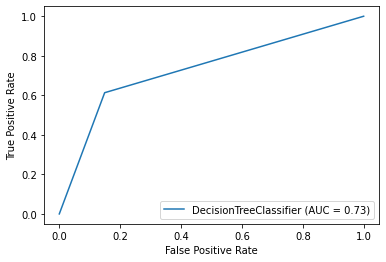

In [49]:
#ROC Curve
dt_disp = plot_roc_curve(clf, X_test, y_test)
plt.show()

In [52]:
#confusion_matrix(y_test, clf.predict(X_test))
pd.crosstab(y_test, clf.predict(X_test), rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,137,24,161
1,41,65,106
All,178,89,267


In [0]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print(rf.score(X_test,y_test))

0.7902621722846442


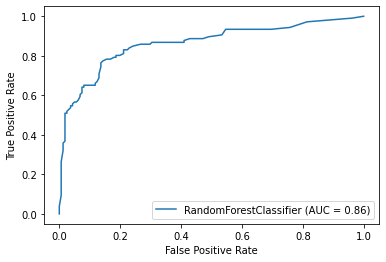

In [55]:
#ROC Curve
rf_disp = plot_roc_curve(rf, X_test, y_test)
plt.show()

In [56]:
#confusion_matrix
pd.crosstab(y_test, rf.predict(X_test), rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,142,19,161
1,37,69,106
All,179,88,267


In [0]:
## Grdient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
print(gbc.score(X_test,y_test))

0.8052434456928839


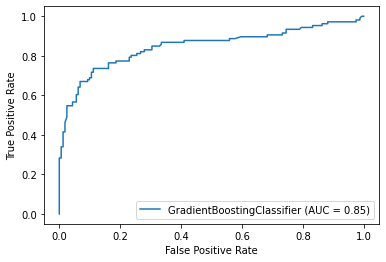

In [60]:
#ROC Curve
gbc_disp = plot_roc_curve(gbc, X_test, y_test)
plt.show()

In [61]:
#confusion_matrix
pd.crosstab(y_test, gbc.predict(X_test), rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,152,9,161
1,43,63,106
All,195,72,267
